# Importando Pandas

In [1]:
import pandas as pd

## Importando a base de dados

In [2]:
tabela = pd.read_csv('barcos_ref.csv')
tabela

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


# Importando Matplotlib e o Seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## Mapa de calor da correlação entre os dados

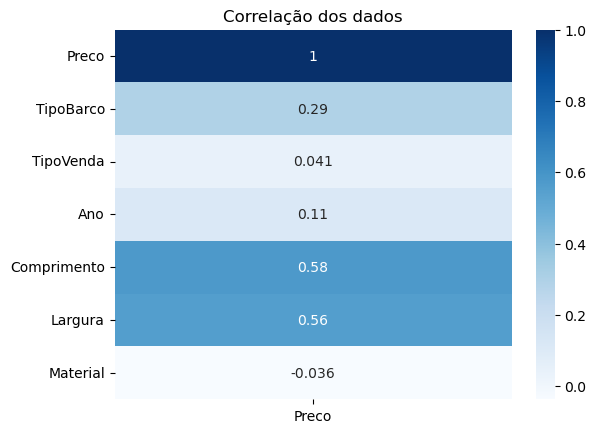

In [9]:
ax = sns.heatmap(tabela.corr()[['Preco']], annot=True, cmap='Blues')
plt.title('Correlação dos dados')
ax = ax

É possível observar que, o comprimento e a largura são os fatores mais relevantes em relação ao preço, pois possuem o maior índice de correlação. Já o tipo de venda, e o material do barco, tem pouca fluência no preço, visto que o valor dde correlação desses dados, é proximo de zero.

# Importando Sklearn

In [11]:
from sklearn.model_selection import train_test_split

## Dividindo varíaveis dependentes e independentes

In [13]:
y = tabela['Preco']
x = tabela.drop('Preco', axis='columns')

In [14]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

## Comparando dois modelos de inteligência artificial

### Importando regressão linear e árvore de decisões

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Criando as IA's
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisoes = RandomForestRegressor()

In [17]:
# Treinando as IA's
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisoes.fit(x_treino, y_treino)

RandomForestRegressor()

## Criando as previsões

In [18]:
from sklearn import metrics

In [19]:
# Criando previsão
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisoes = modelo_arvore_decisoes.predict(x_teste)

In [20]:
# Comparando modelos
print(metrics.r2_score(y_teste, previsao_regressao_linear))
print(metrics.r2_score(y_teste, previsao_arvore_decisoes))

0.44903247607358143
0.8496071341509062


É possível observar, uma melhor precisão para o método da árvore de decisões, com um valor aproximado de 85%, enquanto a regressão linear, apresentou 45% e exatidão.

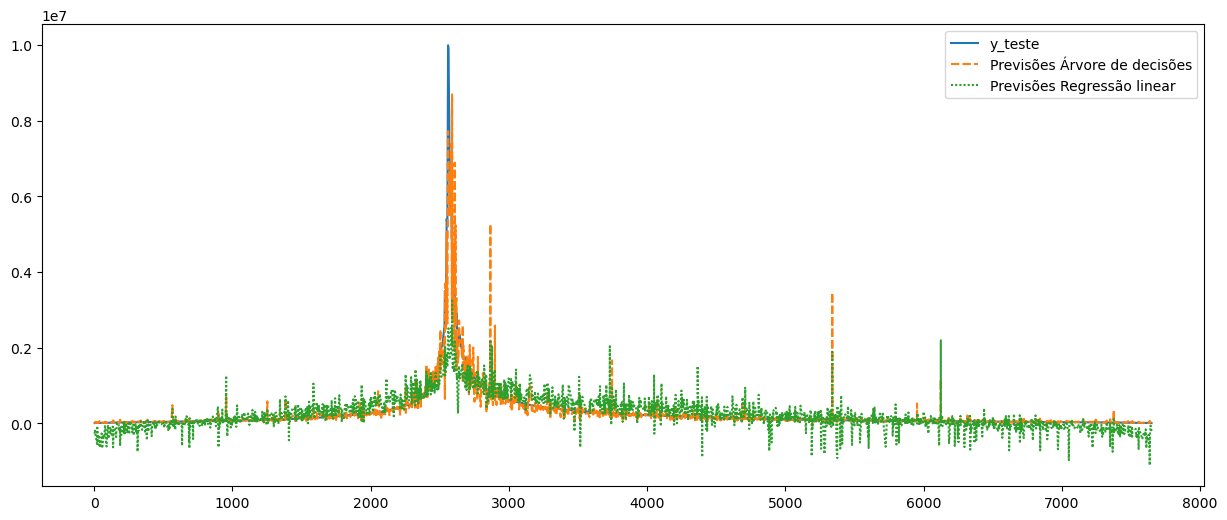

In [21]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsões Árvore de decisões'] = previsao_arvore_decisoes
tabela_auxiliar['Previsões Regressão linear'] = previsao_regressao_linear

plt.figure(figsize=(15,6))
ax = sns.lineplot(data=tabela_auxiliar)
ax = ax

O gráfico confirma o que foi concluído acima. A árvore de decisões apresentou um comportamento mais próximo ao modelo de vendas em relação ao modelo de regressão linear, que apresenta algumas flutuações em relação a base de dados.

# Previsão de preços de três novos barcos

In [22]:
nova_tabela = pd.read_csv('novos_barcos.csv')
nova_tabela

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


In [27]:
previsao = modelo_arvore_decisoes.predict(nova_tabela)
print(f'O preço do barco de pesca com material termoplástico é de € {previsao[0]:.2f}')
print(f'O preço do barco de pesca com material alumínio é de € {previsao[1]:.2f}')
print(f'O preço do Catamaran com material talumínio é de € {previsao[2]:.2f}')

O preço do barco de pesca com material termoplástico é de € 5760.71
O preço do barco de pesca com material alumínio é de € 9075.07
O preço do Catamaran com material talumínio é de € 21560.00


O último barco da tabela, apresentou um maior preço, mesmo sendo mais velho que os outros dois. Isso é devido ao seu tamanho, confirmando o gráfico de calor referente a correlação dos dados, apresentado acima, onde indica um valor de aproxidamente 0.5 para o comprimento e a largura.